In [ ]:
# Perform an analysis using LDA as topic modelling algorithm and determine parameters via an optimization approach

In [292]:
import pickle
from gensim import matutils, models
import scipy.sparse
import pandas as pd
from gensim.models import CoherenceModel

In [293]:
# Set the class of tweets specifying the correct file
f_data = pd.read_csv('../data/negativeTweets.csv')

,Datetime,Tweet Id,OriginalText,Username,Text_Cleaned,tokens,Text,Subjectivity,Polarity,NumberOfWords,MeanWordLength,P&SSentiment,SIA Positive Sentiment,SIA Neutral Sentiment,SIA Negative Sentiment,Class
0,2021-10-27 23:39:35+00:00,1453506696094142469,@1goonrich Buy Dogus and make it 700k mc #NFTG...,aacryp,buy dogus and make it mc kishu hoge froge dog...,"['buy', 'dogus', 'make', 'kishu', 'hoge', 'fro...",buy dogus make kishu hoge froge doge dogus thi...,0.427273,-0.131818,29,5.69,Negative,0.000001,1.000001,0.000001,1
1,2021-10-27 23:32:41+00:00,1453504957991292933,💧 SupreSpace Metaverse 2nd Round Airdrop 💧\n\n...,AirdropStario,suprespace metaverse round airdrop task up to...,"['suprespace', 'round', 'airdrop', 'task', 'sa...",suprespace round airdrop task sapce referral s...,0.400000,-0.200000,10,6.60,Negative,0.000001,1.000001,0.000001,1
2,2021-10-27 23:31:03+00:00,1453504546345455619,@Elite_Portraits is now LIVE hand-crafting the...,DeployStarShip,is now live hand crafting the artwork for the ...,"['live', 'hand', 'crafting', 'artwork', 'plane...",live hand crafting artwork planet game claim p...,0.450000,-0.131818,14,5.93,Negative,0.198001,0.802001,0.000001,0
3,2021-10-27 23:21:00+00:00,1453502019176734729,"Gas sucks, but you know what's worse?? One day...",warcrnft,gas sucks but you know whatworse one day knowi...,"['gas', 'sucks', 'know', 'whatworse', 'day', '...",gas sucks know whatworse day know wow collecti...,0.650000,-0.100000,12,5.83,Negative,0.340001,0.426001,0.234001,1
4,2021-10-27 23:13:01+00:00,1453500008506937345,@jemimajoanna @JanetMurray Brilliant article @...,uninhabited,brilliant article amp global headless ponzi sc...,"['brilliant', 'article', 'global', 'headless',...",brilliant article global headless ponzi scheme...,0.491667,-0.033333,19,6.21,Negative,0.230001,0.547001,0.223001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25357,2022-06-18 18:59:23+00:00,1538234939715780608,@digitalman789 @XANAMetaverse 子供の頃、鉄道模型のジオラマに憧...,ClawnToppi,子供の頃 鉄道模型のジオラマに憧れたのを思い出しちゃいました xana 内を 一般に人気のあ...,"['Zi Gong noQing ', 'Tie Dao Mo Xing noziorama...",Zi Gong noQing Tie Dao Mo Xing nozioramaniCho...,0.000000,0.000000,45,5.96,Neutral,0.000001,0.881001,0.119001,1
25358,2022-06-18 18:57:31+00:00,1538234472080060416,Crazy girl crazy hair 🤪👧🤪👩‍🦰\n\n#NFTCommunity ...,UnicornsMutants,crazy girl crazy hair,"['crazy', 'girl', 'crazy', 'hair']",crazy girl crazy hair,0.900000,-0.600000,4,4.50,Negative,0.000001,0.294001,0.706001,1
25359,2022-06-18 18:56:33+00:00,1538234226109255683,Yeni Haber CoinNews:\nBillionaire Lee Cooperma...,sosyalilgi,yeni haber coinnews billionaire lee cooperman ...,"['yeni', 'haber', 'coinnews', 'billionaire', '...",yeni haber coinnews billionaire lee cooperman ...,0.550000,-0.650000,16,5.75,Negative,0.000001,0.722001,0.278001,1
25360,2022-06-18 18:55:09+00:00,1538233875704745984,🌟 @RichQuack 💎 No Doubt!\n🥇New #Metaverse co...,QuackCollector,no doubt new coming are building their own wor...,"['doubt', 'new', 'coming', 'building', 'world'...",doubt new coming building world world already ...,0.477273,0.136364,10,5.80,Positive,0.000001,0.783001,0.217001,1


In [295]:
# Set the proper range of dates to analyze
f_data = f_data.loc[f_data['Datetime'] >= '2022-05-12']
f_data = f_data.loc[f_data['Datetime'] <= '2022-05-18']

In [298]:
#Create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(f_data.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = f_data.index
tdm = data_dtm.transpose()

In [300]:
# Put the term-document matrix into the gensim format,df -> sparse matrix -> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(data_dtm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [301]:
# Gensim also requires dictionary of the  terms and their respective location in the term-document matrix
cv = pickle.load(open("../data/cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

/usr/local/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.18.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [303]:
# Function to pull out nouns from the text
from nltk import word_tokenize, pos_tag

def nouns(text):
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)]
    return ' '.join(all_nouns)

In [304]:
data_nouns = pd.DataFrame(f_data.Text.apply(nouns))

,Text
21197,thanks airdrop express stokedam guys arenin
21198,drop opensea
21199,chart price downtrend drop level hell pack hom...
21200,announces decision sorry
21201,risks focus intelligence
...,...
21875,wtf
21876,mars information
21877,term partnership shape children families persp...
21878,building source


In [305]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said','game','discord','tweet','twitter'
                  'retweet','check','play','join','world','thing','coinnews']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.Text)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,abbath,ability,abode,abounds,absolute,accenture,access,account,accounts,accumulate,...,zieneshisu,ziyade,znga,zombie,zoo,zoom,zuck,zuckerbergartnet,zuckerbergconcept,zuo
21197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [308]:
# Function to pull out adjectives from a string of text
def nouns_adj(text):
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [309]:
data_nouns_adj = pd.DataFrame(f_data.Text.apply(nouns_adj))

,Text
21197,massive thanks airdrop express stokedam thatmi...
21198,drop opensea
21199,wrld chart poorly price beat first red downtre...
21200,announces decision membershipm sorry
21201,huge risks careful instil focus responsible ar...
...,...
21875,wtf
21876,unstoppable mars information
21877,enteringlong term partnership shape future fun...
21878,info military building source


In [310]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words specifying the max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.Text)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaa,abbath,ability,abode,abounds,absolute,abstract,accenture,access,accessible,...,zieneshisu,ziyade,znga,zombie,zoo,zoom,zuck,zuckerbergartnet,zuckerbergconcept,zuo
21197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [329]:
ldana = models.LdaModel(corpus=corpusna, num_topics=5, id2word=id2wordna, passes=1)
ldana.print_topics()

[(0,
  '0.016*"new" + 0.007*"drop" + 0.006*"platform" + 0.004*"miss" + 0.004*"community" + 0.004*"today" + 0.004*"cybee" + 0.004*"pay" + 0.004*"shib" + 0.004*"alien"'),
 (1,
  '0.025*"drop" + 0.009*"new" + 0.009*"opensea" + 0.007*"wtf" + 0.005*"sign" + 0.004*"mmt" + 0.004*"mint" + 0.004*"today" + 0.004*"atlas" + 0.004*"team"'),
 (2,
  '0.006*"new" + 0.005*"luna" + 0.005*"market" + 0.005*"collection" + 0.005*"news" + 0.004*"terra" + 0.004*"scam" + 0.004*"impact" + 0.004*"community" + 0.004*"team"'),
 (3,
  '0.007*"market" + 0.006*"yeni" + 0.005*"haber" + 0.005*"hours" + 0.005*"moon" + 0.005*"nation" + 0.005*"martians" + 0.005*"gon" + 0.004*"collection" + 0.004*"shill"'),
 (4,
  '0.005*"build" + 0.004*"avatar" + 0.004*"low" + 0.004*"grey" + 0.004*"work" + 0.004*"space" + 0.003*"learn" + 0.003*"week" + 0.003*"update" + 0.003*"economy"')]

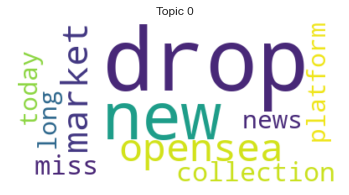

In [328]:
from wordcloud import WordCloud
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.show_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()
create_wordcloud(ldana,0
                 )

In [315]:
from gensim import corpora
word2id = dict((k, v) for k, v in cvna.vocabulary_.items())
d = corpora.Dictionary()
d.id2token = id2word
d.token2id = word2id

In [317]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = models.LdaMulticore(corpus=corpus, num_topics=k, id2word=dictionary, passes=10,alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus,dictionary=dictionary, coherence='u_mass')
    return coherence_model_lda.get_coherence()

In [319]:
from gensim import models
grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

model_results = {
                 'Topics': [],
                 'Coherence': []
                }

if 1 == 1:
    # iterate through number of topics
    for k in topics_range:
            # get the coherence score for the given parameters
            print(k)
            cv = compute_coherence_values(corpus=corpusna, dictionary=d,
                                                  k=k, a=0.5, b=0.5)
            # Save the results
            model_results['Topics'].append(k)
            model_results['Coherence'].append(cv)

2
3
4
5
6
7
8
9


In [321]:
results = pd.DataFrame(model_results)

In [322]:
grouped = (results.groupby(['Topics'], as_index=False)).mean()

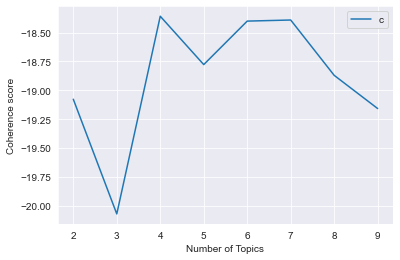

In [323]:
import matplotlib.pyplot as plt
plt.plot(grouped['Topics'], grouped['Coherence'])
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [195]:
results.to_csv("../data/resultsLDA062022.csv",index=False)